# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 3 point scale (0, 1, or 2). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

Score | Expectations
----- | ------------
**0** | _Does not meet expectations. Try again._
**1** | _Meets expectations. Good job._
**2** | _Surpasses expectations. Brilliant!_

[For more information on how we grade our DSI projects, see our project grading walkthrough.](https://git.generalassemb.ly/dsi-projects/readme/blob/master/README.md)


# Executive Summary

This report aims to determine the factors that are important to predict salary amounts and factors that distinguish job titles. Job postings from https://www.mycareersfuture.sg/ were scraped using Selenium and BeautifulSoup. These job postings included keywords such as ‘Data Scientist’, ‘Data Analyst’ and other data science / machine learning related jobs. This report was done on a dataset of 1,491 rows by 11 columns. An Exploratory Data Analysis (EDA) was done to clean and analyse the data for the purpose of this report to ensure that the analysis and results were as accurately as possible.

Multiple models were ran on the dataset and the best model with the highest accuracy was selected. Key features that were used in the job postings were analysed from this model. Logistic Regression with CountVectorizer model scored the highest predicting salary classification with a score of 65% and average f1-score of 62%. Keywords such as Information Technology, Machine Learning and Communication Skills were among the most used words in these job postings.

It was noticed there was an imbalance dataset to analyse factors that distinguishes a classification outcome for job title – Data Scientist. Random forest model with hyperparameter of class_weight=’balance’ was ran to address this issue. Additionally, the train set was upsampled for a accurate test for Logistic Regression. Logistic Regression with TfidfVectorizer model performed better with the upsampled training dataset compared to the rest of the models with a score and f1-score of 95%. False Negative and False Positive are more evenly spread out in this model.


# Question 1

The data that below was scraped from https://www.mycareersfuture.sg/ using <b>Selenium</b> and <b>BeautifulSoup</b>. Job posting searches include keywords such as 'Data Analyst', 'Data Scientist' and other data science / machine learning related roles.

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
careers = './jobs_df_22jul.csv'

In [3]:
jobs = pd.read_csv(careers)

## EDA

In [4]:
# replacing all 'NONE' values to np.nan

jobs.replace('NONE', np.nan, inplace=True)

In [5]:
jobs.shape

(1549, 10)

In [6]:
jobs.head(2)

,Unnamed: 0,Company,Title,Address,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
0,0,NTT DATA SINGAPORE PTE. LTD.,Senior Application Developer,"KEPPEL TOWERS, 10 HOE CHIANG ROAD 089315",Contract,"Executive, Senior Executive",Information Technology,"$8,000to$110,000","Roles & Responsibilities Creating complex, en...",Requirements A Bachelor’s degree in Computer S...
1,1,HP PPS ASIA PACIFIC PTE. LTD.,Business Analyst,1 DEPOT CLOSE 109841,"Permanent, Full Time",Professional,Others,"$8,400to$12,900",Roles & ResponsibilitiesHP is the world’s lead...,RequirementsEducation and Experience Required:...


In [7]:
jobs.sample(3)

,Unnamed: 0,Company,Title,Address,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
162,162,FAIRCHILD SEMICONDUCTOR PTE. LTD.,Business Process Analyst,"TECHPOINT, 10 ANG MO KIO STREET 65 569059",Permanent,Professional,Others,NaN,Roles & ResponsibilitiesPrimary Role Work with...,Requirements Bachelor degree in relevant disci...
683,683,NANYANG TECHNOLOGICAL UNIVERSITY,Research Fellow,"NANYANG TECHNOLOGICAL UNIVERSITY, 50 NANYANG A...","Contract, Full Time",Executive,Sciences / Laboratory / R&D,"$4,000to$5,500",Roles & ResponsibilitiesThe Delta-NTU Corporat...,RequirementsAs above
10,10,ESSENCE GLOBAL MEDIA SINGAPORE PTE. LTD.,Analytics Director,"THE HOUSE OF EDEN, 4 ROBINSON ROAD 048543",Permanent,Senior Management,Advertising / Media,"$90,000to$130,000","Roles & ResponsibilitiesAbout Essence Essence,...",RequirementsA bit about yourself: Degree fro...


In [8]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 10 columns):
Unnamed: 0        1549 non-null int64
Company           1549 non-null object
Title             1549 non-null object
Address           1208 non-null object
Emp_type          1549 non-null object
Seniority         1513 non-null object
Industry          1549 non-null object
Salary            1395 non-null object
Responsibility    1549 non-null object
Requirements      1482 non-null object
dtypes: int64(1), object(9)
memory usage: 121.1+ KB


In [9]:
# Address and Unnamed: 0 columns should not affect the analysis

jobs.drop(['Address', 'Unnamed: 0'], axis=1, inplace=True)

In [10]:
jobs.isnull().sum().sort_values(ascending=False)

Salary            154
Requirements       67
Seniority          36
Responsibility      0
Industry            0
Emp_type            0
Title               0
Company             0
dtype: int64

In [11]:
duplicates = jobs.loc[jobs.duplicated(), :]
print "Initial df shape: ", jobs.shape
print 'Duplicate shape: ', duplicates.shape
jobs.drop(duplicates.index, inplace=True)
print 'No duplicates df shape: ', jobs.shape

Initial df shape:  (1549, 8)
Duplicate shape:  (52, 8)
No duplicates df shape:  (1497, 8)


In [12]:
# removing NONE values
jobs.dropna(how='all', inplace=True)

In [14]:
jobs.shape

(1497, 8)

In [15]:
# renaming values in Seniority column

jobs.Seniority = jobs.Seniority.apply(lambda x: str(x))
# jobs['Seniority'] = ['Middle Management' if 'Manager' in x or 'Middle Management' in x else x for x in jobs.Seniority]
# jobs['Seniority'] = ['Senior Management' if 'Senior Management' in x else x for x in jobs.Seniority]
# jobs['Seniority'] = ['Junior Management' if 'Executive' in x or 'Senior Executive' in x or 'Fresh/entry level' in x else x for x in jobs.Seniority]
# jobs['Seniority'] = ['Others' if 'Non-executive' in x or 'Not listed' in x else x for x in jobs.Seniority]

In [17]:
jobs.loc[41]['Responsibility']

'Roles & ResponsibilitiesBe part of the Consumer Insights and Analytics team (CIA) supporting our digital analytics effort for different business units. Key responsibilities include:  Delivering digital audience insights derived from our digital advertising stack, data management platform and other web analytics tools Delivering key metrics/benchmarks via our business intelligence platform Conducting custom analyses and studies to support business decision makers Integrating digital data from disparate sources, including partnering with Consumer Insights to communicate actionable findings for ongoing business requirements Designing and improving data collection approaches and analytical deliverables '

In [18]:
# does not make sense to be permanent and contract at the same time.
# re-arranging/standardizing some of the Emp_type: Contract, Part Time vs Part Time, Contract

jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Permanent' if x == 'Permanent, Contract' else x)

# Temp == Contract
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Contract, Full Time' if x == 'Temporary, Contract, Full Time' else x)

jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Contract, Part Time' if x == 'Part Time, Temporary' else x)
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Contract' if x == 'Temporary, Contract' else x)
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Contract' if x == 'Temporary' else x)
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Contract, Part Time' if x == 'Part Time, Contract' else x)
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Part Time' if x == 'Part Time, Flexi work' else x)
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Part Time' if x == 'Flexi work' else x)


jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Contract, Full Time' if x == 'Temporary, Full Time' else x)
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Permanent, Full Time' if x == 'Permanent' else x)


# categorizing as others for Emp_type that are not making sense or cannot categorize correctly
jobs['Emp_type'] = jobs['Emp_type'].apply(lambda x: 'Others' if x == 'Part Time, Temporary, Contract, Full Time, Flexi work'
                                          or x == 'Part Time, Permanent, Temporary, Full Time'
                                          or x == 'Permanent, Contract, Freelance, Full Time'
                                          or x == 'Permanent, Contract, Freelance, Flexi work'
                                          or x == 'Contract, Freelance, Full Time, Flexi work'
                                          or x == 'Permanent, Contract, Full Time'
                                          else x)

In [19]:
jobs.Emp_type.value_counts()

Permanent, Full Time                                                 620
Full Time                                                            483
Contract                                                             204
Contract, Full Time                                                  153
Others                                                                22
Part Time                                                              9
Contract, Part Time                                                    3
Internship                                                             2
Part Time, Permanent, Temporary, Contract, Flexi work, Internship      1
Name: Emp_type, dtype: int64

In [23]:
# dropping Emp_type == Internship

jobs.drop(jobs[jobs['Emp_type'] == 'Internship'].index, inplace=True)

In [24]:
# checking Responsibility column before cleaning

jobs.Responsibility[0]

'Roles & Responsibilities \xc2\xa0Creating complex, enterprise-transforming applications on diverse, high energy teams\xc2\xa0 Working with the latest tools and techniques\xc2\xa0 Hands-on coding, usually in a pair programming environment\xc2\xa0 Working in highly collaborative teams and building quality code\xc2\xa0 Knowledge in lots of different domains and client environments\xc2\xa0 Furnish the business domain deeply and working closely with business stakeholders\xc2\xa0 '

In [25]:
# cleaning Responsibility col

jobs.Responsibility = jobs['Responsibility'].apply(lambda x: x.replace('\r', '').replace('\n', ' ')
                                                   .replace('roles', '').replace('responsibilities', '')
                                                   .replace('role', '').replace('responsibility', '')
                                                   .replace('Roles', '').replace('Responsibilities', '')
                                                   .replace('Role', '').replace('Responsibility', '')
                                                   .decode('utf8').encode('ascii', errors='ignore'))
jobs.Responsibility[0]

' &  Creating complex, enterprise-transforming applications on diverse, high energy teams Working with the latest tools and techniques Hands-on coding, usually in a pair programming environment Working in highly collaborative teams and building quality code Knowledge in lots of different domains and client environments Furnish the business domain deeply and working closely with business stakeholders '

In [26]:
# checking Requirements col before cleaning

jobs.Requirements[33]

'RequirementsRequirements: \xc2\xb7\xc2\xa0\xc2\xa0 \xc2\xa0Strong design sense and communication skills \xe2\x80\x93 able to articulate design concepts or ideas \xc2\xb7\xc2\xa0\xc2\xa0 \xc2\xa0Proficient in Adobe CS6, knowledge of web design and 3D software is a bonus\xc2\xa0 \xc2\xb7\xc2\xa0\xc2\xa0 \xc2\xa0Excellent in time management, organization and prioritization skills \xc2\xb7\xc2\xa0\xc2\xa0 \xc2\xa0Ability to multi-task in a fast paced environment whilst maintaining strict attention to details \xc2\xb7\xc2\xa0\xc2\xa0 \xc2\xa0Able to work independently \xc2\xb7\xc2\xa0\xc2\xa0 \xc2\xa0Excellent team player with the ability to manage stakeholders effectively \xc2\xb7\xc2\xa0\xc2\xa0 \xc2\xa0Knowledge in print production, on-site QC for press-checks and ability to prep FA \xc2\xb7\xc2\xa0\xc2\xa0 \xc2\xa0A bachelor\xe2\x80\x99s Degree/ Diploma in Graphic Design, Visual Communications, or a related field is required \xc2\xb7\xc2\xa0\xc2\xa0 \xc2\xa0Knowledge on UI/UX\xc2\xa0 \

In [27]:
# cleaning Requirements col

jobs.Requirements = jobs['Requirements'].apply(lambda x: x.replace('\r', '').replace('\n', ' ')
                                        .decode('utf8').encode('ascii', errors='ignore') if type(x) is str else x)
jobs.Requirements[2]

'RequirementsRequirements:   Minimum B.S. degree in Computer Science or a related technical field Excellent communication skills with the ability to identify and communicate data driven insights 2+ years of Python development and Unix/linux system experience 2+ years of SQL (Mysql, Mssql, Hive, etc)experience You must also possess at least 2 of the additional requirements as below 2+ years of working experience in software development/programming in one of Java, C/C++. OS environment: Linux/Unix 2+ years of working experience with distributed databases or distributed systems 2+ years of working experience with dimensional data modelling & schema design in Data Warehouses 2+ years of working experience working on BigData analytics pipelines (Hadoop, Hive, ETL, RDBMS-Hadoop data management tools like Sqoop)     '

In [28]:
# cleaning Salary col

# jobs1 = jobs.copy()
jobs.Salary.replace('NONE', np.nan, inplace=True)

jobs.Salary = jobs['Salary'].apply(lambda x: x.replace('$', '').replace(',', '').split('to') if type(x) is str else x)



The Salary column is filled up as an object with min and max salary. I will be splitting the min and max salary to 2 columns and taking the average of the 2 for each row. Rows that have null values will be grouped and on seniority and will be replaced with the median salary of the seniority category.

Additionally, I will look at the min and max salary in my dataset to ensure there are no outliers. If there are, I will have to re-calculate the salary amount (perhaps it was quoted differently, compared to the rest. Monthly vs Yearly).

In [29]:
sal = jobs.Salary.apply(pd.Series).add_prefix('salary_')
jobs = pd.concat([jobs, sal], axis=1)

jobs.salary_0 = jobs.salary_0.apply(lambda x: float(x))
jobs.salary_1 = jobs.salary_1.apply(lambda x: float(x))
jobs['avg_sal'] = (jobs.salary_0 + jobs.salary_1) / 2
jobs.head()

jobs.drop(['Salary', 'salary_0', 'salary_1'], axis=1, inplace=True)

In [30]:
print 'Min Salary: ', jobs.avg_sal.min()
print 'Max Salary: ', jobs.avg_sal.max()

# will need to remove the min salary and investigate why is max salary at $300,000

Min Salary:  1.0
Max Salary:  300000.0


In [31]:
jobs[jobs['avg_sal'] == 1]

,Company,Title,Emp_type,Seniority,Industry,Responsibility,Requirements,avg_sal
1029,SGTech,information technology,"Part Time, Permanent, Temporary, Contract, Fle...","Manager, Fresh/entry level, Executive, Junior ...","Engineering, Information Technology, Others, S...",& TalentGuru(www.talentguru.org) is a skills-...,"RequirementsFor more details, visit talentguru...",1.0


In [32]:
# jobs[jobs.Seniority == 'Manager, Fresh/entry level, Executive, Junior Executive']

In [33]:
jobs[jobs['avg_sal'] < 1000]

,Company,Title,Emp_type,Seniority,Industry,Responsibility,Requirements,avg_sal
176,NATIONAL UNIVERSITY OF SINGAPORE,Data Recorder (National Adult Oral Health Survey),"Contract, Part Time",Non-executive,General Work,"& The Faculty of Dentistry, National Universi...",RequirementsThe Data Recorders shall have com...,10.0
1029,SGTech,information technology,"Part Time, Permanent, Temporary, Contract, Fle...","Manager, Fresh/entry level, Executive, Junior ...","Engineering, Information Technology, Others, S...",& TalentGuru(www.talentguru.org) is a skills-...,"RequirementsFor more details, visit talentguru...",1.0


In [34]:
# dropping salary outlier since it is the only job in Seniority - 'Manager, Fresh/entry level, Executive, Junior Executive'

min_outlier = jobs[jobs['avg_sal'] < 1000]
jobs.drop(min_outlier.index, inplace=True)

In [35]:
# checking for duplicates again

duplicates1 = jobs.loc[jobs.duplicated(), :]
print "Initial df shape: ", jobs.shape
print 'Duplicate shape: ', duplicates1.shape
jobs.drop(duplicates1.index, inplace=True)
print 'No duplicates df shape: ', jobs.shape

Initial df shape:  (1493, 8)
Duplicate shape:  (1, 8)
No duplicates df shape:  (1492, 8)


In [36]:
jobs[['Seniority', 'Requirements']] = jobs[['Seniority', 'Requirements']].fillna('Not listed', axis=1)

In [37]:
# getting median salary for all seniority groups

seniority_median_sal = jobs.groupby('Seniority')['avg_sal'].median()
seniority_median_sal_df = seniority_median_sal.to_frame().reset_index()
seniority_median_sal_df.columns = ['Seniority', 'avg_sal_by_sen']
seniority_median_sal_df.sort_values('Seniority', ascending=True)

,Seniority,avg_sal_by_sen
0,Executive,5500.00
1,"Executive, Junior Executive",3400.00
2,"Executive, Junior Executive, Senior Executive",4975.00
3,"Executive, Non-executive",10000.00
4,"Executive, Non-executive, Junior Executive",3930.50
5,"Executive, Non-executive, Junior Executive, Se...",5350.00
6,"Executive, Senior Executive",5500.00
7,Fresh/entry level,4000.00
8,"Fresh/entry level, Executive",4000.00
9,"Fresh/entry level, Executive, Non-executive",4750.00


In [38]:
jobs.reset_index(inplace=True)

In [39]:
# fill NAs for avg_sal column in jobs DF based on Seniority col. NAs would be replaced by mean salary from seniority groups Df

temp_df = jobs.set_index('Seniority').avg_sal.fillna(seniority_median_sal_df.set_index('Seniority').avg_sal_by_sen).reset_index()
temp_df.columns = ['Seniority_1', 'Avg_sal']
jobs = pd.concat([jobs, temp_df], axis=1)
jobs.drop(['Seniority_1', 'avg_sal', 'index'], axis=1, inplace=True)

In [40]:
# check again for null values

jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 8 columns):
Company           1492 non-null object
Title             1492 non-null object
Emp_type          1492 non-null object
Seniority         1492 non-null object
Industry          1492 non-null object
Responsibility    1492 non-null object
Requirements      1492 non-null object
Avg_sal           1491 non-null float64
dtypes: float64(1), object(7)
memory usage: 93.3+ KB


In [41]:
jobs[jobs['Avg_sal'].isnull()]

,Company,Title,Emp_type,Seniority,Industry,Responsibility,Requirements,Avg_sal
527,SINGAPORE TECHNOLOGIES ENGINEERING LTD,Data Scientist,"Permanent, Full Time","Senior Management, Middle Management, Manager,...",Sciences / Laboratory / R&D,& Job Description: - Work in Strategic Techno...,RequirementsRequirements: - Prefer a Master's ...,NaN


In [42]:
# dropping row 513. No similar seniority or industry and emp_type having avg_sal

jobs.drop(527, inplace=True)

In [44]:
jobs.shape

(1491, 8)

In [45]:
import scipy.stats as stats

print 'Average Salary: ', jobs.Avg_sal.mean()
print 'Median Salary: ', jobs.Avg_sal.median()
print 'Salary Std Dev: ', jobs.Avg_sal.std()

jobs['Avg_sal_percentile'] = [stats.percentileofscore(jobs['Avg_sal'], num) for num in jobs['Avg_sal']]

Average Salary:  9222.70238095
Median Salary:  6500.0
Salary Std Dev:  17396.3178339


In [46]:
sal_std = jobs.Avg_sal.std()
sal_median = jobs.Avg_sal.median()
upper_limit = sal_median + sal_std
lower_limit = sal_median - sal_std

In [47]:
# these salaries could be quoted on per annum instead of per month. They will have to be converted to per month salaries.

outliers = jobs[(jobs.Avg_sal >  upper_limit) | (jobs.Avg_sal < lower_limit)]
outliers.sort_values('Avg_sal', ascending=True)

,Company,Title,Emp_type,Seniority,Industry,Responsibility,Requirements,Avg_sal,Avg_sal_percentile
1414,INTERSOFTKK (SINGAPORE) PTE. LTD.,Business Analyst,Part Time,Senior Executive,Information Technology,& Description Application Developer (Backend...,RequirementsTechnical Skills Required Technica...,32000.0,97.920858
1401,NTT DATA SINGAPORE PTE. LTD.,Full Stack Developer,Contract,"Professional, Executive, Senior Executive",Information Technology,& Work closely with scrum master and the res...,Requirements Bachelor Degree with min 3 years ...,42500.0,97.987928
1215,OBSERVATIONAL AND PRAGMATIC RESEARCH INSTITUTE...,Research Project Manager,"Permanent, Full Time",Manager,Healthcare / Pharmaceutical,"& Our team, based in the UK and Singapore, ev...",RequirementsEssential skills & experience: Pr...,54500.0,98.054997
1250,EPAM SYSTEMS PTE. LTD.,Senior Business Analyst,"Permanent, Full Time",Senior Executive,Information Technology,& Key in driving and supporting migration ...,Requirements Degree (and above) in Information...,58500.0,98.122066
0,NTT DATA SINGAPORE PTE. LTD.,Senior Application Developer,Contract,"Executive, Senior Executive",Information Technology,"& Creating complex, enterprise-transforming ...",Requirements A Bachelors degree in Computer Sc...,59000.0,98.189135
580,VISA WORLDWIDE PTE. LIMITED,"Analyst, Visa Consulting and Analytics","Permanent, Full Time",Fresh/entry level,"Consulting , Others",& Are you skilled at turning hard numbers int...,RequirementsQualifications We are looking for ...,65000.0,98.256204
1313,ROBERT WALTERS (SINGAPORE) PTE LTD,Data Steward,"Permanent, Full Time",Senior Executive,Information Technology,& A global buyside firm has a job opportunity...,RequirementsTo succeed in the Data Steward job...,70000.0,98.356808
483,UBS AG,Database Analyst,Full Time,Executive,Banking and Finance,& Are you curious? Do you love data? Are you ...,RequirementsYou have - hands on data preparati...,70000.0,98.356808
1474,SYNGENTA ASIA PACIFIC PTE. LTD.,Regional Planner,Full Time,Manager,Manufacturing,& Regional Planner APAC Singapore About Synge...,RequirementsWe are looking for: At least 3-5 ...,72500.0,98.457411
1354,ILLUMINA SINGAPORE PTE. LTD.,"SAP Senior Business Solution Analyst, Logistic...",Full Time,Senior Executive,Others,& This functions as a Senior Analyst and is ...,RequirementsPreferred Experience: Experience ...,75000.0,98.558015


In [48]:
print 'Outliers shape: ', outliers.shape

Outliers shape:  (32, 9)


In [49]:
jobs.drop(outliers.index, inplace=True)

#  Avg_sal / 12 to standardize with the rest at monthly salary
outliers['Avg_sal'] = outliers['Avg_sal'].apply(lambda x: x / 12)

C:\Users\Arsyad\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [50]:
# checking for top salaries in jobs.Avg_sal to ensure there are no outliers in the col

jobs = pd.concat([jobs,outliers])
jobs.sort_values('Avg_sal_percentile', ascending=False)

,Company,Title,Emp_type,Seniority,Industry,Responsibility,Requirements,Avg_sal,Avg_sal_percentile
237,DATASPARK PTE. LTD.,"Director, Data Science","Permanent, Full Time",Middle Management,Information Technology,& The Director of Data Science will be a key...,RequirementsQualifications 7+ years experienc...,25000.000000,100.000000
248,AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED,"Sr. Data Architect, Data Warehousing & MPP","Permanent, Full Time",Professional,Information Technology,"& At Amazon Web Services (AWS), were hiring h...",RequirementsBasic Qualifications BA/BS degree...,22916.666667,99.932931
514,ESSENCE GLOBAL MEDIA SINGAPORE PTE. LTD.,Senior Media Planning Director,"Permanent, Full Time",Senior Management,Advertising / Media,"& About Essence Essence, part of GroupM, is a...",RequirementsA bit about yourself: At least 7...,13333.333333,99.798793
1294,STANDARD CHARTERED BANK,"Senior Manager, Advanced Analytics, ERM",Full Time,Manager,Banking and Finance,& Leading the way in International Banking. W...,"RequirementsQualifications: Training, licenses...",13333.333333,99.798793
236,ENGINE BIOSCIENCES PTE. LTD.,Bioinformatics Manager,Full Time,Manager,"Healthcare / Pharmaceutical, Information Techn...",& Engine Biosciences is a venture-backed biot...,RequirementsMinimum Requirements Ph.D. in Bio...,13333.333333,99.798793
189,INTELLECT DESIGN ARENA PTE. LTD.,Subject-Matter Expert - Trade and Supply Chain...,"Permanent, Full Time",Middle Management,Information Technology,& Demonstrate how product functionality can ...,Requirements Should have minimum 18+years of e...,12916.666667,99.664655
1423,ROBERT WALTERS (SINGAPORE) PTE LTD,Business Analyst,Contract,Senior Management,Banking and Finance,& A Business Analyst job based in Singapore h...,RequirementsTo succeed in this Business Analys...,11250.000000,99.597586
257,FAIR ISAAC (ASPAC) PTE. LTD.,Solution Consulting – Lead Consultant,"Permanent, Full Time",Middle Management,"Consulting , Banking and Finance, Information ...",& Job title Solution Consulting Lead Consul...,Requirements A minimum of five years Business ...,11000.000000,99.530516
724,AMBITION GROUP SINGAPORE PTE. LTD.,Senior Digital Marketing Manager,"Permanent, Full Time",Manager,Marketing / Public Relations,"& This will be having the overall ownership,...",Requirements Minimum 8 years of experiencein e...,10833.333333,99.463447
305,UBS AG,IT Software Engineer Unix / Linux,"Permanent, Full Time",Executive,Banking and Finance,& Do you possess all-round development skills...,RequirementsYou have: experience designing an...,10625.000000,99.396378


https://blog.moneysmart.sg/career/average-salary-singapore/

###### Based on the website above, data scientist salary stats are as below:

25th-percentile = $5,505   / 3,803 (average of all in the list)

Median = $6,279   / 4,711 (average of all in the list)

75th-percentile = $7,836  / 5,708 (average of all in the list)

###### For the salary categorization below, I will base it on the data scientist stats above.

Very low salary: x <= 5,505

Low salary: 5,505 < x <= 6,279

High salary: 6,279 < x <= 7,836

Very high salary: x > 7,836

In [51]:
# splitting based on percentile to 4 salary categories - very low salary, low salary, high salary, very high salary

# current y
jobs['sal_cat'] = jobs.Avg_sal.apply(lambda x: 'very low salary' if x <= 5505  else ('low salary' if 5505 < x <= 6279 else ('high salary' if 6279 < x <= 7836 else 'very high salary')))

In [52]:
jobs.sal_cat.value_counts()/len(jobs)*100

very low salary     35.881958
very high salary    32.796781
high salary         20.791415
low salary          10.529846
Name: sal_cat, dtype: float64

[Text(0.5,0,u'Monthly Salary')]

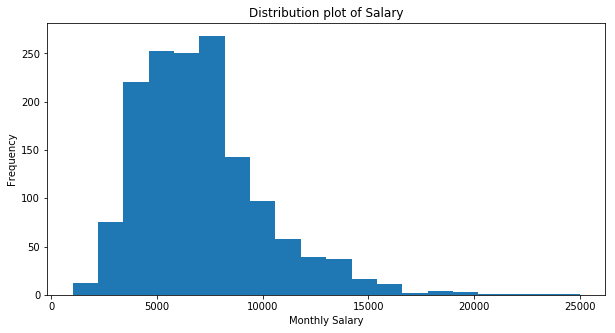

In [147]:
plt.figure(figsize=(10,5))
jobs['Avg_sal'].plot(kind='hist', bins=20, title='Distribution plot of Salary').set(xlabel='Monthly Salary')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

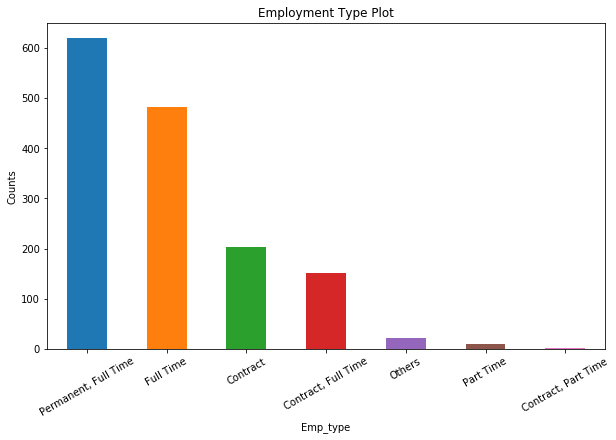

In [152]:
plt.figure(figsize=(10,6))
jobs.Emp_type.value_counts().plot(kind='bar', title='Employment Type Plot').set(xlabel='Emp_type', ylabel='Counts')
plt.xticks(rotation=30)

In [55]:
jobs['all_info']= jobs['Company'] + ' ' + jobs.Title + ' ' + jobs.Emp_type + ' ' \
    + jobs.Seniority + ' ' + jobs.Industry + ' ' + jobs.Responsibility + ' ' + jobs.Requirements

In [56]:
jobs.reset_index(inplace=True)
jobs.drop('index', axis=1, inplace=True)

In [57]:
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words

stopwords_sk = stop_words.ENGLISH_STOP_WORDS  #from sklearn
# stopwords_nltk = stopwords.words('english')  #from nltk

In [58]:
additional_words = ['Roles', 'Responsibilities', 'Requirements', 'RequirementsRequirements', 'Qualifications', 'Roles & ResponsibilitiesRole'
                   'Roles & ResponsibilitiesResponsibilities']
stopwords_sk = stopwords_sk.union(additional_words)

In [61]:
X = jobs.all_info

y = jobs['sal_cat']

## Getting the scores

In [62]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, k_means
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.base import TransformerMixin
from sklearn.svm import SVC
import string

C:\Users\Arsyad\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(1192L,)
(299L,)
(1192L,)
(299L,)


In [64]:
X_train = X_train.reset_index()
X_train.drop('index', axis=1, inplace=True)

y_train = y_train.reset_index()
y_train.drop('index', axis=1, inplace=True)
y_train = y_train.T.squeeze()

In [65]:
X_test = X_test.reset_index()
X_test.drop('index', axis=1, inplace=True)
# X_test = X_test.T.squeeze()

y_test = y_test.reset_index()
y_test.drop('index', axis=1, inplace=True)
y_test = y_test.T.squeeze()

In [66]:
print len(y_train)
print len(X_train)

1192
1192


In [67]:
# lemmatizing X_train

lemma = WordNetLemmatizer()
stemmer = PorterStemmer()

X_train_temp = []
for i in range (0,len(X_train)):
    col = re.sub('[^a-zA-Z]', ' ', X_train['all_info'][i])
    col = col.lower()
    col = col.split()
    col = [lemma.lemmatize(word) for word in col if not word in set(stopwords_sk)]
    col = ' '.join(col)
    X_train_temp.append(col)

X_train = X_train_temp

In [68]:
X_test_temp = []
for i in range (0,len(X_test)):
    col = re.sub('[^a-zA-Z]', ' ', X_test['all_info'][i])
    col = col.lower()
    col = col.split()
    col = [lemma.lemmatize(word) for word in col if not word in set(stopwords_sk)]
    col = ' '.join(col)
    X_test_temp.append(col)

X_test = X_test_temp

In [69]:
# checking for imbalance dataset
y_train.value_counts() / len(y_train) * 100

very high salary    34.060403
very low salary     33.976510
high salary         21.057047
low salary          10.906040
Name: sal_cat, dtype: float64

### KNN (base line model)

In [70]:
pipe_knntf = Pipeline([('tfidf', TfidfVectorizer()), 
                 ('knn', KNeighborsClassifier())])

pipe_knntf.fit(X_train, y_train)

print 'Score: {}' .format(pipe_knntf.score(X_test, y_test))

Score: 0.428093645485


In [71]:
pipe_knncv = Pipeline([('cvec', CountVectorizer()), 
                 ('knn', KNeighborsClassifier())])

pipe_knncv.fit(X_train, y_train)

print 'Score: {}' .format(pipe_knncv.score(X_test, y_test))

Score: 0.438127090301


### LogisticRegression

#### Logistic Regression GridSearch for TfidfVectorizer

##### Logistic Regression GridSearch for TfidfVectorizer fit

In [72]:
pipe_lrtf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords_sk)), 
                 ('lr', LogisticRegression())])

param_grid_lrtf = {'tfidf__min_df': [1, 2, 3],
              'tfidf__ngram_range': [(1,2), (2,3)],   # data; data scientist; senior data scientist
              'lr__C': [0.01, 0.1, 1, 10],
              'lr__penalty': ['l1', 'l2']
             }

grid_lrtf = GridSearchCV(pipe_lrtf, param_grid_lrtf, verbose=2, cv=5, n_jobs=-1)

grid_lrtf.fit(X_train, y_train)

scaler = grid_lrtf.best_estimator_.named_steps['tfidf']
classifer = grid_lrtf.best_estimator_.named_steps['lr']

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.9min finished


##### Logistic Regression GridSearch for TfidfVectorizer score

In [73]:
print 'Score: {}' .format(grid_lrtf.score(X_test, y_test)), '\n\n'

print 'Best parameters: ', grid_lrtf.best_params_, '\n'

model_gridsearch_lrtf = grid_lrtf.best_estimator_
print 'Best estimators score: ', model_gridsearch_lrtf.score(X_test, y_test), '\n'

grid_predictions_lrtf = grid_lrtf.predict(X_test)

print 'Confusion matrix: \n', confusion_matrix(y_test, grid_predictions_lrtf), '\n'
print 'Classification report: \n', classification_report(y_test, grid_predictions_lrtf)

Score: 0.615384615385 


Best parameters:  {'lr__penalty': 'l2', 'tfidf__ngram_range': (2, 3), 'lr__C': 10, 'tfidf__min_df': 3} 

Best estimators score:  0.6153846153846154 

Confusion matrix: 
[[ 19   2  26  12]
 [  5   2   9  11]
 [  9   3  61  10]
 [  6   2  20 102]] 

Classification report: 
                  precision    recall  f1-score   support

     high salary       0.49      0.32      0.39        59
      low salary       0.22      0.07      0.11        27
very high salary       0.53      0.73      0.61        83
 very low salary       0.76      0.78      0.77       130

     avg / total       0.59      0.62      0.59       299



##### Features

In [74]:
X_train_df = pd.DataFrame(scaler.transform(X_train).todense(),
                   columns=scaler.get_feature_names())

word_count = X_train_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count').tail(5)  # for train set

,word,word_count
6586,data analytics,13.524383
20081,permanent time,13.597686
3375,business analyst,15.010280
14147,information technology,16.521784
16506,machine learning,17.907894


In [75]:
word_count_df.sort_values('word_count').head()  # for train set

,word,word_count
31814,zookeeper zkclient tool,0.080393
1478,analytics project change,0.080393
14534,integration process designing,0.080393
14518,integration delivery tool,0.080393
14517,integration delivery,0.080393


In [76]:
X_test_df = pd.DataFrame(scaler.transform(X_test).todense(),
                      columns=scaler.get_feature_names())

word_count = X_test_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count', ascending=False).head()

,word,word_count
14147,information technology,5.135786
16506,machine learning,4.932858
2993,big data,4.795046
3375,business analyst,4.433876
20081,permanent time,4.026305


In [77]:
word_count_df.sort_values('word_count', ascending=False).tail()

,word,word_count
13766,including design,0.0
13765,including demonstrated,0.0
13764,including data warehousing,0.0
13763,including data mapping,0.0
31814,zookeeper zkclient tool,0.0


#### Logistic Regression GridSearch for CountVectorizer

##### Logistic Regression GridSearch for CountVectorizer fit

In [253]:
pipe_lrcv = Pipeline([('cvec', CountVectorizer(stop_words=stopwords_sk)), 
                 ('lr', LogisticRegression())])

param_grid_lrcv = {'cvec__min_df': [1, 2, 3],
              'cvec__ngram_range': [(1,2), (2,3)],   # data scientist; senior data scientist
              'lr__C': [0.01, 0.1, 1, 10],
              'lr__penalty': ['l1', 'l2']
             }

grid_lrcv = GridSearchCV(pipe_lrcv, param_grid_lrcv, verbose=1, cv=5, n_jobs=-1)

grid_lrcv.fit(X_train, y_train)

scaler = grid_lrcv.best_estimator_.named_steps['cvec']
classifer = grid_lrcv.best_estimator_.named_steps['lr']

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.3min finished


##### Logistic Regression GridSearch for CountVectorizer score

In [255]:
print 'Score: {}' .format(grid_lrcv.score(X_test, y_test)), '\n\n'

print 'Best parameters: ', grid_lrcv.best_params_, '\n'

model_gridsearch_lrcv = grid_lrcv.best_estimator_
print 'Best estimators score: ', model_gridsearch_lrcv.score(X_test, y_test), '\n\n'

grid_predictions_lrcv = grid_lrcv.predict(X_test)

print 'Confusion matrix: \n', confusion_matrix(y_test, grid_predictions_lrcv), '\n'
print 'Classification report: \n', classification_report(y_test, grid_predictions_lrcv)

Score: 0.652173913043 


Best parameters:  {'cvec__min_df': 1, 'cvec__ngram_range': (2, 3), 'lr__penalty': 'l2', 'lr__C': 0.1} 

Best estimators score:  0.6521739130434783 


Confusion matrix: 
[[ 19   2  23  15]
 [  3   3   7  14]
 [  9   3  61  10]
 [  6   3   9 112]] 

Classification report: 
                  precision    recall  f1-score   support

     high salary       0.51      0.32      0.40        59
      low salary       0.27      0.11      0.16        27
very high salary       0.61      0.73      0.67        83
 very low salary       0.74      0.86      0.80       130

     avg / total       0.62      0.65      0.62       299



##### Features

In [256]:
# to get features out
X_train_df = pd.DataFrame(scaler.transform(X_train).todense(),
                   columns=scaler.get_feature_names())

word_count = X_train_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count').tail(10)  # for train set

,word,word_count
107587,experience working,289
29592,big data,343
53028,computer science,381
65889,data analytics,428
33131,business analyst,431
311982,year experience,432
49830,communication skill,450
199823,permanent time,496
163340,machine learning,534
140220,information technology,632


In [81]:
word_count_df.sort_values('word_count').head(10)  # for train set

,word,word_count
156486,leadership quality proficient,1
193514,outcome challenging circumstance,1
193516,outcome client accenture,1
193519,outcome collaborate,1
193520,outcome collaborate cross,1


In [257]:
# Converting out vectorized test data to a dataframe
# Using the CVEC which we fit earlier

X_test_df = pd.DataFrame(scaler.transform(X_test).todense(),
                      columns=scaler.get_feature_names())

word_count = X_test_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count', ascending=False).head(10) # test set

,word,word_count
140220,information technology,166
29592,big data,124
199823,permanent time,123
163340,machine learning,120
33131,business analyst,109
53028,computer science,102
65889,data analytics,102
49830,communication skill,97
311982,year experience,85
289497,time executive,70


In [258]:
word_count_df.sort_values('word_count', ascending=False).tail(10)  # test set

,word,word_count
111064,familiar memory,0
111065,familiar memory cpu,0
111066,familiar mindset,0
111067,familiar mindset work,0
111068,familiar multiple,0
111069,familiar multiple aspect,0
111070,familiar mvt,0
111071,familiar mvt testing,0
111072,familiar nlp,0
312972,zurich swiss federal,0


### Random Forest

#### Random Forest GridSearch for CountVectorizer

##### RF GridSearch for CountVectorizer fit

In [85]:
pipe_rfcv = Pipeline([('cvec', CountVectorizer(stop_words=stopwords_sk)), 
                 ('rfc', RandomForestClassifier(class_weight="balanced"))]) # class_weight="balanced"

param_grid_rfcv = {'cvec__min_df': [1, 2, 3],
              'cvec__ngram_range': [(1,2), (2,3)],   # data scientist; senior data scientist
              'rfc__n_estimators': [1, 5, 10],
              'rfc__criterion': ['entropy', 'gini']
             }

grid_rfcv = GridSearchCV(pipe_rfcv, param_grid_rfcv, verbose=1, cv=5, n_jobs=-1)

grid_rfcv.fit(X_train, y_train)

scaler = grid_rfcv.best_estimator_.named_steps['cvec']   #extracting the features out
classifer = grid_rfcv.best_estimator_.named_steps['rfc']

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.5min finished


##### RF GridSearch for CountVectorizer score

In [86]:
print 'Score: {}' .format(grid_rfcv.score(X_test, y_test)), '\n\n'

print 'Best parameters: ', grid_rfcv.best_params_, '\n'

model_gridsearch_rfcv = grid_rfcv.best_estimator_
print 'Best estimators score: ', model_gridsearch_rfcv.score(X_test, y_test), '\n\n'

grid_predictions_rfcv = grid_rfcv.predict(X_test)

print 'Confusion matrix: \n', confusion_matrix(y_test, grid_predictions_rfcv), '\n'
print 'Classification report: \n', classification_report(y_test, grid_predictions_rfcv)

Score: 0.605351170569 


Best parameters:  {'cvec__min_df': 1, 'rfc__criterion': 'gini', 'cvec__ngram_range': (2, 3), 'rfc__n_estimators': 10} 

Best estimators score:  0.6053511705685619 


Confusion matrix: 
[[ 20   1  26  12]
 [  4   3   6  14]
 [ 21   3  47  12]
 [ 10   2   7 111]] 

Classification report: 
                  precision    recall  f1-score   support

     high salary       0.36      0.34      0.35        59
      low salary       0.33      0.11      0.17        27
very high salary       0.55      0.57      0.56        83
 very low salary       0.74      0.85      0.80       130

     avg / total       0.58      0.61      0.58       299



##### Features

In [87]:
# to get features out
X_train_df = pd.DataFrame(scaler.transform(X_train).todense(),
                   columns=scaler.get_feature_names())

word_count = X_train_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count').tail(5)  # for train set

,word,word_count
311982,year experience,432
49830,communication skill,450
199823,permanent time,496
163340,machine learning,534
140220,information technology,632


In [88]:
word_count_df.sort_values('word_count').head()  # for train set

,word,word_count
156486,leadership quality proficient,1
193514,outcome challenging circumstance,1
193516,outcome client accenture,1
193519,outcome collaborate,1
193520,outcome collaborate cross,1


In [89]:
# Converting out vectorized test data to a dataframe
# Using the CVEC which we fit earlier

X_test_df = pd.DataFrame(scaler.transform(X_test).todense(),
                      columns=scaler.get_feature_names())

word_count = X_test_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count', ascending=False).head() # test set

,word,word_count
140220,information technology,166
29592,big data,124
199823,permanent time,123
163340,machine learning,120
33131,business analyst,109


In [90]:
word_count_df.sort_values('word_count', ascending=False).tail()  # test set

,word,word_count
111069,familiar multiple aspect,0
111070,familiar mvt,0
111071,familiar mvt testing,0
111072,familiar nlp,0
312972,zurich swiss federal,0


#### Random Forest GridSearch for CountVectorizer

##### RF GridSearch for TFidfVectorizer fit

In [92]:
pipe_rftf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords_sk)), 
                 ('rfc', RandomForestClassifier(class_weight="balanced"))])  # class_weight="balanced"

param_grid_rftf = {'tfidf__min_df': [1, 2, 3],
              'tfidf__ngram_range': [(1,2), (2,3)],   # data scientist; senior data scientist
              'rfc__n_estimators': [1, 5, 10],
              'rfc__criterion': ['entropy', 'gini']
             }

grid_rftf = GridSearchCV(pipe_rftf, param_grid_rftf, verbose=1, cv=5, n_jobs=-1)

grid_rftf.fit(X_train, y_train)

scaler = grid_rftf.best_estimator_.named_steps['tfidf']   #extracting the features out
classifer = grid_rftf.best_estimator_.named_steps['rfc']

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.7min finished


##### RF GridSearch for TFidfVectorizer score

In [93]:
print 'Score: {}' .format(grid_rftf.score(X_test, y_test)), '\n\n'

print 'Best parameters: ', grid_rftf.best_params_, '\n'

model_gridsearch_rftf = grid_rftf.best_estimator_
print 'Best estimators score: ', model_gridsearch_rftf.score(X_test, y_test), '\n\n'

grid_predictions_rftf = grid_rftf.predict(X_test)

print 'Confusion matrix: \n', confusion_matrix(y_test, grid_predictions_rftf), '\n'
print 'Classification report: \n', classification_report(y_test, grid_predictions_rftf)

Score: 0.612040133779 


Best parameters:  {'rfc__criterion': 'gini', 'rfc__n_estimators': 10, 'tfidf__ngram_range': (2, 3), 'tfidf__min_df': 2} 

Best estimators score:  0.6120401337792643 


Confusion matrix: 
[[ 23   2  19  15]
 [  3   2   8  14]
 [ 15   3  54  11]
 [ 12   3  11 104]] 

Classification report: 
                  precision    recall  f1-score   support

     high salary       0.43      0.39      0.41        59
      low salary       0.20      0.07      0.11        27
very high salary       0.59      0.65      0.62        83
 very low salary       0.72      0.80      0.76       130

     avg / total       0.58      0.61      0.59       299



##### Features

In [94]:
# to get features out
X_train_df = pd.DataFrame(scaler.transform(X_train).todense(),
                   columns=scaler.get_feature_names())

word_count = X_train_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count').tail(5)  # for train set

,word,word_count
46098,permanent time,10.903473
15131,data analytics,10.998130
7598,business analyst,12.274615
32614,information technology,13.378400
37995,machine learning,14.546876


In [95]:
word_count_df.sort_values('word_count').head()  # for train set

,word,word_count
59221,site cross,0.045766
14040,course applied statistic,0.045766
18266,desire identify work,0.045766
48928,process fault,0.045766
48929,process fault detection,0.045766


In [96]:
# Converting out vectorized test data to a dataframe
# Using the CVEC which we fit earlier

X_test_df = pd.DataFrame(scaler.transform(X_test).todense(),
                      columns=scaler.get_feature_names())

word_count = X_test_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count', ascending=False).head() # test set

,word,word_count
32614,information technology,4.458433
37995,machine learning,4.209483
6776,big data,4.138326
7598,business analyst,3.902731
46098,permanent time,3.473791


In [97]:
word_count_df.sort_values('word_count', ascending=False).tail()  # test set

,word,word_count
28347,global industry,0.0
28348,global industry member,0.0
28350,global information security,0.0
28351,global innovation,0.0
72400,zuellig pharma holding,0.0


In [98]:
pipe5 = Pipeline([('tfidf', TfidfVectorizer()), 
                 ('cart', DecisionTreeClassifier(criterion='entropy'))])

pipe5.fit(X_train, y_train)

print 'Score: {}' .format(pipe5.score(X_test, y_test))

Score: 0.454849498328


### XGBoosting

In [99]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

#### XGBoost with CountVectorizer

In [102]:
params = {
       'min_child_weight': [1, 5, 10],
       'gamma': [0.5, 1, 1.5, 2, 5],
       'subsample': [0.6, 0.8, 1.0],
       'colsample_bytree': [0.6, 0.8, 1.0],
       'max_depth': [3, 4, 5]
       }

pipe_xgbcv = Pipeline([('cvec', CountVectorizer(stop_words=stopwords_sk, min_df=1, ngram_range=(2,3))), 
                 ('xgb', XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                   silent=True, nthread=1))])

pipe_xgbcv.fit(X_train,y_train)

scaler = pipe_xgbcv.named_steps['cvec']   #extracting the features out
classifer = pipe_xgbcv.named_steps['xgb']

In [105]:
print 'Score: {}' .format(pipe_xgbcv.score(X_test, y_test)), '\n\n'

print 'Best parameters: ', pipe_xgbcv.named_steps, '\n'

# model_gridsearch_xgbcv = pipe_xgbcv.best_estimator_
print 'Best estimators score: ', pipe_xgbcv.score(X_test, y_test), '\n\n'

grid_predictions_xgbcv = pipe_xgbcv.predict(X_test)

print 'Confusion matrix: \n', confusion_matrix(y_test, grid_predictions_xgbcv), '\n'
print 'Classification report: \n', classification_report(y_test, grid_predictions_xgbcv)

C:\Users\Arsyad\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


 Score: 0.625418060201 


Best parameters:  {'xgb': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1), 'cvec': CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 3), preprocessor=None,
        stop_words=frozenset(['all', 'show', 'anyway', 'fifty', 'four', 'go', 'mill', 'find', 'seemed', 'whose', 're', 'herself', 'whoever', 'behind', 'should', 'to', 'only', 'under', 'herein', 'do', 'his', 'Roles', 'get', 'very', 'de', 'myself', 'cannot', 'every', 'yourselves', 'him', 'is', 'cry

C:\Users\Arsyad\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


 0.6254180602006689 


Confusion matrix: 
[[ 19   1  25  14]
 [  2   1  11  13]
 [  8   1  61  13]
 [  7   0  17 106]] 

Classification report: 
                  precision    recall  f1-score   support

     high salary       0.53      0.32      0.40        59
      low salary       0.33      0.04      0.07        27
very high salary       0.54      0.73      0.62        83
 very low salary       0.73      0.82      0.77       130

     avg / total       0.60      0.63      0.59       299



C:\Users\Arsyad\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Question 2

## Preparing dataset for Q2

In [244]:
jobs1 = jobs.copy()

In [245]:
# if data_scientist == 1, else == 0

jobs1['data_scientist'] = jobs1.Title.apply(lambda x: 1 if 'data scientist' in x.lower() or 'data science' in x.lower() or 'scientist' in x.lower() or 'science' in x.lower() else 0)
# df['cat_Scientist'] = df['Title'].str.contains('scientist|science')*1

In [246]:
jobs1.data_scientist.value_counts()

# there is class imbalance, but we can use random forest with class_weight="balanced"

0    1365
1     126
Name: data_scientist, dtype: int64

In [247]:
# from sklearn.utils import resample

# # Separate majority and minority classes
# df_majority = jobs1[jobs1.data_scientist == 0]
# df_minority = jobs1[jobs1.data_scientist == 1]
 
# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=1092,    # to match majority class
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# jobs1_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# # Display new class counts
# jobs1_upsampled.data_scientist.value_counts()

In [248]:
jobs1['all_info_q2']= jobs1['Company'] + ' ' + jobs1.Emp_type + ' ' \
    + jobs1.Seniority + ' ' + jobs1.Industry + ' ' + jobs1.Responsibility + ' ' + jobs1.Requirements

In [249]:
jobs1.reset_index(inplace=True)
jobs1.drop('index', axis=1, inplace=True)

X_q2 = jobs1.all_info_q2
y_q2 = jobs1['data_scientist']

X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(X_q2, y_q2, test_size=0.2, random_state=42)

# check the shape of train and test set
print X_train_q2.shape
print X_test_q2.shape
print y_train_q2.shape
print y_test_q2.shape

# resetting index to lemmatize train set
X_train_q2 = X_train_q2.reset_index()
X_train_q2.drop('index', axis=1, inplace=True)

y_train_q2 = y_train_q2.reset_index()
y_train_q2.drop('index', axis=1, inplace=True)
y_train_q2 = y_train_q2.T.squeeze()


# resetting index to lemmatize test set
X_test_q2 = X_test_q2.reset_index()
X_test_q2.drop('index', axis=1, inplace=True)
# X_test_q2 = X_test_q2.T.squeeze()

y_test_q2 = y_test_q2.reset_index()
y_test_q2.drop('index', axis=1, inplace=True)
y_test_q2 = y_test_q2.T.squeeze()

(1192L,)
(299L,)
(1192L,)
(299L,)


In [250]:
# to lemmatize my X_train_q2

X_train_temp_q2 = []
for i in range (0,len(X_train_q2)):
    col = re.sub('[^a-zA-Z]', ' ', X_train_q2['all_info_q2'][i])
    col = col.lower()
    col = col.split()
    col = [lemma.lemmatize(word) for word in col if not word in set(stopwords_sk)]
    col = ' '.join(col)
    X_train_temp_q2.append(col)

X_train_q2 = X_train_temp_q2

In [251]:
# lemmatize X_test_q2

X_test_temp_q2 = []
for i in range (0,len(X_test_q2)):
    col = re.sub('[^a-zA-Z]', ' ', X_test_q2['all_info_q2'][i])
    col = col.lower()
    col = col.split()
    col = [lemma.lemmatize(word) for word in col if not word in set(stopwords_sk)]
    col = ' '.join(col)
    X_test_temp_q2.append(col)

X_test_q2 = X_test_temp_q2

In [286]:
temp_x_train_df = pd.DataFrame({'all_info_q2':X_train_q2})
temp_y_train_df = pd.DataFrame({'data_scientist':y_train_q2})
temp_df = pd.concat([temp_x_train_df, temp_y_train_df], axis=1)

In [288]:
temp_df.data_scientist.value_counts()

0    1092
1     100
Name: data_scientist, dtype: int64

In [289]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = temp_df[temp_df.data_scientist == 0]
df_minority = temp_df[temp_df.data_scientist == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1092,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
jobs1_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
jobs1_upsampled.data_scientist.value_counts()

1    1092
0    1092
Name: data_scientist, dtype: int64

In [294]:
X_train_q2_up = jobs1_upsampled['all_info_q2']
y_train_q2_up = jobs1_upsampled.data_scientist

## Getting the scores

### AUC plot function

In [ ]:
#write function to get model performance
def model_performance(model, X_train_q2, y_train_q2, X_test_q2, y_test_q2):
    model.fit(X_train_q2, y_train_q2)
    Y_pp = pd.DataFrame(model.predict_proba(X_test_q2), columns=['class_0_pp','class_1_pp'])
    #roc, auc for model for common performance measurement
    
    from sklearn.metrics import roc_curve, auc
    
    # For class 1, find the area under the curve.
    fpr, tpr, _ = roc_curve(y_test_q2, Y_pp.class_1_pp)
    roc_auc = auc(fpr, tpr)
    
    # Plot of a ROC curve.
    plt.figure(figsize=[4,4])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic for 1', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()
    print 'auc:',roc_auc
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn import metrics
    
    #fit and predict
    class_fit = model.fit(X_train_q2, y_train_q2)
    class_pred = model.predict(X_test_q2)
    
    #confusion matrix and f1-score
    conmat = np.array(confusion_matrix(y_test_q2, class_pred))
    confusion = pd.DataFrame(conmat, index=[0,1], columns=['predicted_0','predicted_1'])
    f1_score = metrics.f1_score(y_test_q2, class_pred, average='weighted')
    precision_score = metrics.precision_score(y_test_q2, class_pred, average='weighted')
    print ''
    print 'Confusion Table:'
    print (confusion)
    print ''
    print 'Classification Report:'
    print (classification_report(y_test_q2, class_pred))
    print 'f1:',f1_score
    print 'precision:',precision_score
    return roc_auc, f1_score, precision_score

### Random Forest

#### RF GridSearch for CountVectorizer

In [163]:
pipe_rfcv_q2 = Pipeline([('cvec', CountVectorizer(stop_words=stopwords_sk)), 
                 ('rfc', RandomForestClassifier(class_weight="balanced"))])

param_grid_rfcv_q2 = {'cvec__min_df': [1, 2, 3],
              'cvec__ngram_range': [(1,2), (2,3)],   # data scientist; senior data scientist
              'rfc__n_estimators': [1, 5, 10],
              'rfc__criterion': ['entropy', 'gini']
             }

grid_rfcv_q2 = GridSearchCV(pipe_rfcv_q2, param_grid_rfcv_q2, verbose=1, cv=5, n_jobs=-1)

grid_rfcv_q2.fit(X_train_q2, y_train_q2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('cvec', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozense...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'cvec__min_df': [1, 2, 3], 'rfc__n_estimators': [1, 5, 10], 'cvec__ngram_range': [(1, 2), (2, 3)], 'rfc__criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [164]:
scaler = grid_rfcv_q2.best_estimator_.named_steps['cvec']   #extracting the features out
classifer = grid_rfcv_q2.best_estimator_.named_steps['rfc']

##### RF GridSearch for CountVectorizer score

In [165]:
print 'Best parameters: ', grid_rfcv_q2.best_params_, '\n'

model_gridsearch_rfcv_q2 = grid_rfcv_q2.best_estimator_
print 'Best estimators score: ', model_gridsearch_rfcv_q2.score(X_test_q2, y_test_q2), '\n\n'

grid_predictions_rfcv_q2 = grid_rfcv_q2.predict(X_test_q2)

print 'Confusion matrix: \n', confusion_matrix(y_test_q2, grid_predictions_rfcv_q2), '\n'
print 'Classification report: \n', classification_report(y_test_q2, grid_predictions_rfcv_q2)

Best parameters:  {'cvec__min_df': 2, 'rfc__criterion': 'entropy', 'cvec__ngram_range': (2, 3), 'rfc__n_estimators': 10} 

Best estimators score:  0.9945054945054945 


Confusion matrix: 
[[267   3]
 [  0 276]] 

Classification report: 
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       270
          1       0.99      1.00      0.99       276

avg / total       0.99      0.99      0.99       546



##### Features

In [120]:
X_train_df = pd.DataFrame(scaler.transform(X_train_q2).todense(),
                   columns=scaler.get_feature_names())

word_count = X_train_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count').tail(5)  # for train set

,word,word_count
22981,management,2359
38610,team,2926
4625,business,3770
14293,experience,4222
9067,data,5289


In [121]:
word_count_df.sort_values('word_count').head()  # for train set

,word,word_count
41681,valuation critical,2
29000,presentation management,2
14073,execute smart,2
14071,execute rule,2
29003,presentation oral,2


In [122]:
# Converting out vectorized test data to a dataframe
# Using the CVEC which we fit earlier

X_test_df = pd.DataFrame(scaler.transform(X_test_q2).todense(),
                      columns=scaler.get_feature_names())

word_count = X_test_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count', ascending=False).head() # test set

,word,word_count
9067,data,1258
4625,business,907
14293,experience,906
38610,team,720
22981,management,599


In [123]:
word_count_df.sort_values('word_count', ascending=False).tail()  # test set

,word,word_count
5361,cb,0
21880,legal advisor,0
5362,cb bb,0
21878,legacy technology,0
25927,ocaml computer,0


##### Plotting AUC

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.2min finished


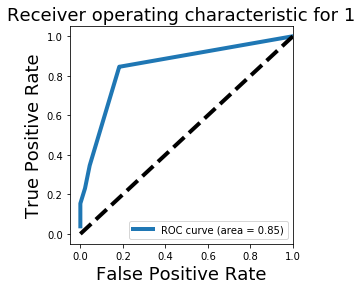

auc: 0.8472809242040013
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.2min finished



Confusion Table:
   predicted_0  predicted_1
0          271            2
1           17            9

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97       273
          1       0.82      0.35      0.49        26

avg / total       0.93      0.94      0.92       299

f1: 0.9244236098456047
precision: 0.9302947957839263


(0.8472809242040013, 0.9244236098456047, 0.9302947957839263)

In [125]:
model_performance(grid_rfcv_q2, X_train_q2, y_train_q2, X_test_q2, y_test_q2)

#### RF GridSearch with TfidfVectorizer

In [126]:
pipe_rftf_q2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords_sk)), 
                 ('rfc', RandomForestClassifier(class_weight="balanced"))])

param_grid_rftf_q2 = {'tfidf__min_df': [1, 2, 3],
              'tfidf__ngram_range': [(1,2), (2,3)],   # data scientist; senior data scientist
              'rfc__n_estimators': [1, 5, 10],
              'rfc__criterion': ['entropy', 'gini']
             }

grid_rftf_q2 = GridSearchCV(pipe_rftf_q2, param_grid_rftf_q2, verbose=1, cv=5, n_jobs=-1)

grid_rftf_q2.fit(X_train_q2, y_train_q2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=Tru...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'rfc__n_estimators': [1, 5, 10], 'rfc__criterion': ['entropy', 'gini'], 'tfidf__ngram_range': [(1, 2), (2, 3)], 'tfidf__min_df': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [127]:
scaler = grid_rftf_q2.best_estimator_.named_steps['tfidf']   #extracting the features out
classifer = grid_rftf_q2.best_estimator_.named_steps['rfc']

##### RF GridSearch for CountVectorizer score

In [128]:
print 'Best parameters: ', grid_rftf_q2.best_params_, '\n'

model_gridsearch_rftf_q2 = grid_rftf_q2.best_estimator_
print 'Best estimators score: ', model_gridsearch_rftf_q2.score(X_test_q2, y_test_q2), '\n\n'

grid_predictions_rftf_q2 = grid_rftf_q2.predict(X_test_q2)

print 'Confusion matrix: \n', confusion_matrix(y_test_q2, grid_predictions_rftf_q2), '\n'
print 'Classification report: \n', classification_report(y_test_q2, grid_predictions_rftf_q2)

Best parameters:  {'rfc__criterion': 'entropy', 'rfc__n_estimators': 5, 'tfidf__ngram_range': (1, 2), 'tfidf__min_df': 2} 

Best estimators score:  0.9364548494983278 


Confusion matrix: 
[[269   4]
 [ 15  11]] 

Classification report: 
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       273
          1       0.73      0.42      0.54        26

avg / total       0.93      0.94      0.93       299



##### Features

In [129]:
X_train_df = pd.DataFrame(scaler.transform(X_train_q2).todense(),
                   columns=scaler.get_feature_names())

word_count = X_train_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count').tail(5)  # for train set

,word,word_count
22981,management,30.442771
38610,team,32.635919
4625,business,45.766848
14293,experience,45.804918
9067,data,65.631728


In [130]:
word_count_df.sort_values('word_count').head()  # for train set

,word,word_count
17225,growth distributor,0.04725
18809,including identified,0.04725
22655,maintain appropriate,0.04725
3634,bank achieving,0.04725
11849,doubt exist,0.04725


In [131]:
# Converting out vectorized test data to a dataframe
# Using the CVEC which we fit earlier

X_test_df = pd.DataFrame(scaler.transform(X_test_q2).todense(),
                      columns=scaler.get_feature_names())

word_count = X_test_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count', ascending=False).head() # test set

,word,word_count
9067,data,17.478539
4625,business,12.784309
14293,experience,10.876446
38610,team,8.706150
22981,management,8.548311


In [132]:
word_count_df.sort_values('word_count', ascending=False).tail()  # test set

,word,word_count
20637,jira nexus,0.0
20636,jira docker,0.0
20634,jira certification,0.0
3531,ba pm,0.0
24551,minimum educational,0.0


##### Plot

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.4min finished


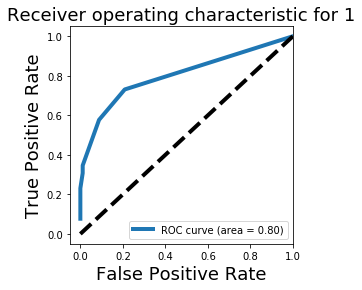

auc: 0.8021978021978021
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.3min finished



Confusion Table:
   predicted_0  predicted_1
0          271            2
1           13           13

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       273
          1       0.87      0.50      0.63        26

avg / total       0.95      0.95      0.94       299

f1: 0.9435983939107209
precision: 0.9466115533782405


(0.8021978021978021, 0.9435983939107209, 0.9466115533782405)

In [133]:
model_performance(grid_rftf_q2, X_train_q2, y_train_q2, X_test_q2, y_test_q2)

### Logistic Regression

#### Logistic Regression with TfidfVectorizer

In [320]:
pipe_lrtf_q2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords_sk)), 
                 ('lr', LogisticRegression())])

param_grid_lrtf_q2 = {'tfidf__min_df': [1, 2, 3],
              'tfidf__ngram_range': [(1,2), (2,3)],   # data; data scientist; senior data scientist
              'lr__C': [0.01, 0.1, 1, 10],
              'lr__penalty': ['l1', 'l2']
             }

grid_lrtf_q2 = GridSearchCV(pipe_lrtf_q2, param_grid_lrtf_q2, verbose=2, cv=5, n_jobs=-1)

grid_lrtf_q2.fit(X_train_q2_up, y_train_q2_up)

scaler = grid_lrtf_q2.best_estimator_.named_steps['tfidf']
classifer = grid_lrtf_q2.best_estimator_.named_steps['lr']

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.4min finished


##### RF GridSearch for TfidfVectorizer score

In [321]:
print 'Score: {}' .format(grid_lrtf_q2.score(X_test_q2, y_test_q2)), '\n\n'

print 'Best parameters: ', grid_lrtf_q2.best_params_, '\n'

model_gridsearch_lrtf_q2 = grid_lrtf_q2.best_estimator_
print 'Best estimators score: ', model_gridsearch_lrtf_q2.score(X_test_q2, y_test_q2), '\n'

grid_predictions_lrtf_q2 = grid_lrtf_q2.predict(X_test_q2)

print 'Confusion matrix: \n', confusion_matrix(y_test_q2, grid_predictions_lrtf_q2), '\n'
print 'Classification report: \n', classification_report(y_test_q2, grid_predictions_lrtf_q2)

Score: 0.953177257525 


Best parameters:  {'lr__penalty': 'l2', 'tfidf__ngram_range': (2, 3), 'lr__C': 10, 'tfidf__min_df': 2} 

Best estimators score:  0.9531772575250836 

Confusion matrix: 
[[268   5]
 [  9  17]] 

Classification report: 
             precision    recall  f1-score   support

          0       0.97      0.98      0.97       273
          1       0.77      0.65      0.71        26

avg / total       0.95      0.95      0.95       299



##### Features

In [322]:
# to get features out
X_train_df = pd.DataFrame(scaler.transform(X_train_q2).todense(),
                   columns=scaler.get_feature_names())

word_count = X_train_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count').tail(5)  # for train set

,word,word_count
62547,pte permanent,9.109697
13769,communication skill,10.296958
87608,year experience,10.621886
56034,permanent time,10.735145
39362,information technology,11.953842


In [323]:
word_count_df.sort_values('word_count').head()  # for train set

,word,word_count
64630,related company business,0.032849
87021,working programming scripting,0.032849
87020,working programming,0.032849
62040,prototype experience,0.032849
24027,district leverage,0.032849


In [324]:
# Converting out vectorized test data to a dataframe
# Using the CVEC which we fit earlier

X_test_df = pd.DataFrame(scaler.transform(X_test_q2).todense(),
                      columns=scaler.get_feature_names())

word_count = X_test_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count', ascending=False).head() # test set

,word,word_count
39362,information technology,4.130004
56034,permanent time,3.473948
62548,pte permanent time,3.037475
62547,pte permanent,3.037475
8162,big data,3.036609


In [325]:
word_count_df.sort_values('word_count', ascending=False).tail()  # test set

,word,word_count
33793,gathering general functional,0.0
33792,gathering general,0.0
33790,gathering documentation priority,0.0
33789,gathering documentation,0.0
87932,zurich swiss federal,0.0


#### RF GridSearch with CountVectorizer

In [300]:
pipe_lrcv_q2 = Pipeline([('cvec', CountVectorizer(stop_words=stopwords_sk)), 
                 ('lr', LogisticRegression())])

param_grid_lrcv_q2 = {'cvec__min_df': [1, 2, 3],
              'cvec__ngram_range': [(1,2), (2,3)],   # data scientist; senior data scientist
              'lr__C': [0.01, 0.1, 1, 10],
              'lr__penalty': ['l1', 'l2']
             }

grid_lrcv_q2 = GridSearchCV(pipe_lrcv_q2, param_grid_lrcv_q2, verbose=1, cv=5, n_jobs=-1)

grid_lrcv_q2.fit(X_train_q2_up, y_train_q2_up)

scaler = grid_lrcv_q2.best_estimator_.named_steps['cvec']
classifer = grid_lrcv_q2.best_estimator_.named_steps['lr']

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  7.3min finished


##### RF GridSearch for CountVectorizer score

In [310]:
print 'Score: {}' .format(grid_lrcv_q2.score(X_test_q2, y_test_q2)), '\n\n'

print 'Best parameters: ', grid_lrcv_q2.best_params_, '\n'

model_gridsearch_lrcv_q2 = grid_lrcv_q2.best_estimator_
print 'Best estimators score: ', model_gridsearch_lrcv_q2.score(X_test_q2, y_test_q2), '\n'

grid_predictions_lrcv_q2 = grid_lrcv_q2.predict(X_test_q2)

print 'Confusion matrix: \n', confusion_matrix(y_test_q2, grid_predictions_lrcv_q2), '\n'
print 'Classification report: \n', classification_report(y_test_q2, grid_predictions_lrcv_q2)

Score: 0.953177257525 


Best parameters:  {'cvec__min_df': 3, 'cvec__ngram_range': (2, 3), 'lr__penalty': 'l2', 'lr__C': 1} 

Best estimators score:  0.9531772575250836 

Confusion matrix: 
[[270   3]
 [ 11  15]] 

Classification report: 
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       273
          1       0.83      0.58      0.68        26

avg / total       0.95      0.95      0.95       299



##### Features

In [311]:
# to get features out
X_train_df = pd.DataFrame(scaler.transform(X_train_q2).todense(),
                   columns=scaler.get_feature_names())

word_count = X_train_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count').tail(5)  # for train set

,word,word_count
53022,year experience,432
8276,communication skill,450
33762,permanent time,496
27681,machine learning,524
23492,information technology,624


In [312]:
word_count_df.sort_values('word_count').head()  # for train set

,word,word_count
26613,learning educational technical,1
26358,leadership team lead,1
26339,leadership including student,1
26337,leadership implementation advanced,1
26336,leadership implementation,1


In [313]:
# Converting out vectorized test data to a dataframe
# Using the CVEC which we fit earlier

X_test_df = pd.DataFrame(scaler.transform(X_test_q2).todense(),
                      columns=scaler.get_feature_names())

word_count = X_test_df.sum(axis=0)

word_count.sort_values(ascending=False).head()

word_count_df = pd.DataFrame({'word':word_count.index,
                             'word_count': word_count.values})

word_count_df.sort_values('word_count', ascending=False).head() # test set

,word,word_count
23492,information technology,165
33762,permanent time,123
27681,machine learning,116
4957,big data,111
8858,computer science,102


In [314]:
word_count_df.sort_values('word_count', ascending=False).tail()  # test set

,word,word_count
21282,haskell task data,0
21283,haskell typed,0
21284,haskell typed functional,0
21287,having built,0
53226,zurich swiss federal,0
